# ml lab2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1.1 read lab1 data

In [8]:
import os

DATA_PATH = '../lab1/data/notMNIST_small'

letters = sorted(os.listdir(DATA_PATH))

image_width = 28

X = []
y = []

for l_id, letter in enumerate(letters):
    l_dir = f'{DATA_PATH}/{letter}'
    for image in os.listdir(l_dir):
        try:
            img = plt.imread(f'{l_dir}/{image}')
            X.append(img.reshape(-1, image_width * image_width)[0])
            y.append(l_id)
        except:
            continue

In [10]:
len(X), len(y)

(18724, 18724)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

### 1.2 build network

In [79]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [156]:
sizes = [784, 1200, 1200, 1200, 400, 100, 10]

epochs = 400
step = 512
learning_rate = 1e-3

mu = np.mean(X)
std = np.std(X)

In [87]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        for i in range(1, len(sizes)):
            l = nn.Linear(sizes[i - 1], sizes[i])
            setattr(self, f'l{i}', l)
            if i != len(sizes) - 1:
                setattr(self, f'relu{i}', nn.LeakyReLU())
        
    def forward(self, x):
        for l in network.children():
            x = l(x)
        return F.log_softmax(x, dim=1)

network = Network()
devide = torch.device('cpu')
network.to(devide)

Network(
  (l1): Linear(in_features=784, out_features=1200, bias=True)
  (relu1): LeakyReLU(negative_slope=0.01)
  (l2): Linear(in_features=1200, out_features=1200, bias=True)
  (relu2): LeakyReLU(negative_slope=0.01)
  (l3): Linear(in_features=1200, out_features=1200, bias=True)
  (relu3): LeakyReLU(negative_slope=0.01)
  (l4): Linear(in_features=1200, out_features=400, bias=True)
  (relu4): LeakyReLU(negative_slope=0.01)
  (l5): Linear(in_features=400, out_features=100, bias=True)
  (relu5): LeakyReLU(negative_slope=0.01)
  (l6): Linear(in_features=100, out_features=10, bias=True)
)

In [88]:
import torch.optim as optim

optimizer = optim.Adagrad(network.parameters(), lr=learning_rate)
loss_func = nn.CrossEntropyLoss()

x_tensor = torch.FloatTensor(X_train)
y_tensor = torch.LongTensor(y_train)

n = len(X_train)
n

14979

In [89]:
loss_data = []

for e in range(epochs):
    for i in range(0, n - step, step):
        x_i = x_tensor[i:i + step].to(devide)
        y_i = y_tensor[i:i + step].to(devide)
        
        optimizer.zero_grad()
        predict = network(x_i)
        
        loss = loss_func(predict, y_i)
        loss.backward()
        optimizer.step()
        
        if i % 1000 == 0:
            loss_data.append(loss.data)
    if e > 0 and e % 10 == 0:    
        print(f'Epoch{e}:\tloss: {loss.data:.6f}')

Epoch10:	loss: 0.271209
Epoch20:	loss: 0.208018
Epoch30:	loss: 0.160350
Epoch40:	loss: 0.119195
Epoch50:	loss: 0.098869
Epoch60:	loss: 0.078770
Epoch70:	loss: 0.066453
Epoch80:	loss: 0.054954
Epoch90:	loss: 0.044032
Epoch100:	loss: 0.033680
Epoch110:	loss: 0.022876
Epoch120:	loss: 0.014876
Epoch130:	loss: 0.010553
Epoch140:	loss: 0.008259
Epoch150:	loss: 0.006850
Epoch160:	loss: 0.005875
Epoch170:	loss: 0.005169
Epoch180:	loss: 0.004641
Epoch190:	loss: 0.004260
Epoch200:	loss: 0.003956
Epoch210:	loss: 0.003726
Epoch220:	loss: 0.003561
Epoch230:	loss: 0.003391
Epoch240:	loss: 0.003280
Epoch250:	loss: 0.003158
Epoch260:	loss: 0.003073
Epoch270:	loss: 0.003018
Epoch280:	loss: 0.002937
Epoch290:	loss: 0.002881
Epoch300:	loss: 0.002840
Epoch310:	loss: 0.002789
Epoch320:	loss: 0.002751
Epoch330:	loss: 0.002719
Epoch340:	loss: 0.002691
Epoch350:	loss: 0.002686
Epoch360:	loss: 0.002646
Epoch370:	loss: 0.002615
Epoch380:	loss: 0.002608
Epoch390:	loss: 0.002584


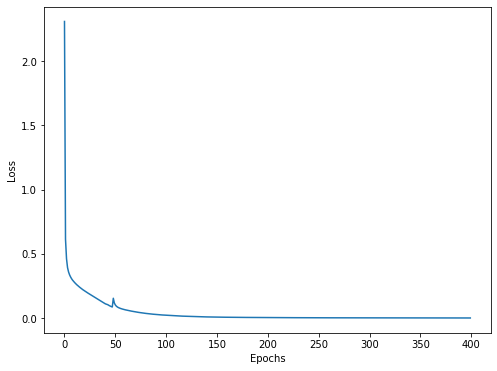

In [99]:
def draw(data):
    plt.figure(figsize=(8, 6))
    plt.plot(data)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

network.eval();
draw(loss_data)

### 2. accuracy

In [160]:
def get_accuracy(net, normilize=False):
    test_tensor = torch.FloatTensor(X_test).to(device)
    if normilize:
        test_tensor = (test_tensor - mu) / std
    test_predict = net(test_tensor)

    _, max_index = torch.max(test_predict, 1)
    y_predict = max_index.tolist()


    return accuracy_score(y_predict, y_test)

test_score = get_accuracy(network)
print(f'score:\t{test_score * 100:.2f}%')

score:	91.05%


> `91.1%` vs `86.7%` with logistic regression

### 3. regularization & dropout vs overfitting

In [167]:
epochs = 100

In [174]:
class DropoutNetwork(nn.Module):
    def __init__(self):
        super(DropoutNetwork, self).__init__()
        self.l1 = nn.Linear(sizes[0], sizes[1])
        self.bn1 = nn.BatchNorm1d(num_features=sizes[1])
        self.relu1 = nn.LeakyReLU()
        self.drop1 = nn.Dropout(0.25)
        self.l2 = nn.Linear(sizes[1], sizes[2])
        self.relu2 = nn.LeakyReLU()
        self.drop2 = nn.Dropout(0.5)
        self.l3 = nn.Linear(sizes[2], sizes[3])
        self.relu3 = nn.LeakyReLU()
        self.drop3 = nn.Dropout(0.25)
        self.l4 = nn.Linear(sizes[3], sizes[4])
        self.relu4 = nn.LeakyReLU()
        self.drop4 = nn.Dropout(0.5)
        self.l5 = nn.Linear(sizes[4], sizes[5])
        self.relu5 = nn.LeakyReLU()
        self.l6 = nn.Linear(sizes[5], sizes[6])
        
    def forward(self, x):
        x = self.bn1(self.l1(x))
        x = F.relu(x)
        x = self.relu1(x)
        x = self.drop1(x)
        x = self.l2(x)
        x = self.relu2(x)
        x = self.drop2(x)
        x = self.l3(x)
        x = self.relu3(x)
        x = self.drop3(x)
        x = self.l4(x)
        x = self.relu4(x)
        x = self.drop4(x)
        x = self.l5(x)
        x = self.relu5(x)
        x = self.l6(x)
        return F.log_softmax(x, dim=0)

d_network = DropoutNetwork()
d_network.to(device)

DropoutNetwork(
  (l1): Linear(in_features=784, out_features=1200, bias=True)
  (bn1): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): LeakyReLU(negative_slope=0.01)
  (drop1): Dropout(p=0.25, inplace=False)
  (l2): Linear(in_features=1200, out_features=1200, bias=True)
  (relu2): LeakyReLU(negative_slope=0.01)
  (drop2): Dropout(p=0.5, inplace=False)
  (l3): Linear(in_features=1200, out_features=1200, bias=True)
  (relu3): LeakyReLU(negative_slope=0.01)
  (drop3): Dropout(p=0.25, inplace=False)
  (l4): Linear(in_features=1200, out_features=400, bias=True)
  (relu4): LeakyReLU(negative_slope=0.01)
  (drop4): Dropout(p=0.5, inplace=False)
  (l5): Linear(in_features=400, out_features=100, bias=True)
  (relu5): LeakyReLU(negative_slope=0.01)
  (l6): Linear(in_features=100, out_features=10, bias=True)
)

In [175]:
x_norm_tensor = torch.FloatTensor((X_train - mu) / std)
y_norm_tensor = torch.LongTensor(y_train)

optimizer = optim.Adagrad(d_network.parameters(), lr=learning_rate)

In [150]:
norm_loss_data = []

for e in range(epochs):
    for i in range(0, n - step, step):
        x_i = x_norm_tensor[i:i + step].to(devide)
        y_i = y_norm_tensor[i:i + step].to(devide)
        
        optimizer.zero_grad()
        predict = d_network(x_i)
        
        loss = loss_func(predict, y_i)
        loss.backward()
        optimizer.step()
        
        if i % 1000 == 0:
            norm_loss_data.append(loss.data)
    if e % 10 == 0:    
        print(f'Epoch{e}:\tloss: {loss.data:.6f}')

Epoch0:	loss: 0.447742
Epoch10:	loss: 0.232536
Epoch20:	loss: 0.146050
Epoch30:	loss: 0.105410
Epoch40:	loss: 0.092520
Epoch50:	loss: 0.071526
Epoch60:	loss: 0.045665
Epoch70:	loss: 0.040764
Epoch80:	loss: 0.038154
Epoch90:	loss: 0.024794


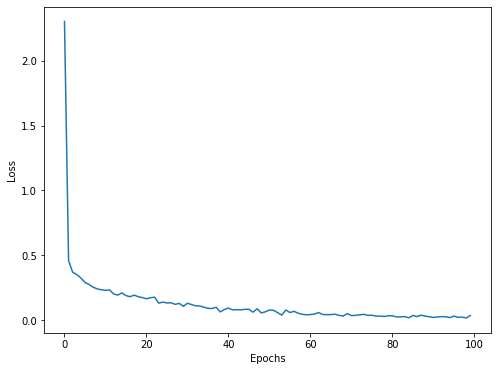

In [164]:
network.eval();
draw(norm_loss_data)

### 4. dynamic learning rate

In [178]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

epochs = 40
learning_rate = 0.1
optimizer = torch.optim.SGD(d_network.parameters(), lr=learning_rate, momentum=0.9, nesterov=True)
scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.1, patience=0, verbose=True)

In [179]:
loss_data = []

for e in range(epochs):
    for i in range(0, n - step, step):
        x_i = x_norm_tensor[i:i + step].to(devide)
        y_i = y_norm_tensor[i:i + step].to(devide)
        
        optimizer.zero_grad()
        predict = xd(x_i)
        
        loss = loss_func(predict, y_i)
        loss.backward()
        optimizer.step()
        
        if i % 1000 == 0:
            loss_data.append(loss.data)
    accuracy = get_accuracy(d_network, True)
    if e % 10 == 0:
        print(f'Epoch#{e}:\tloss: {loss.data:.6f}\taccuracy: {accuracy:.6f}')
    scheduler.step(accuracy)

Epoch#0:	loss: 0.228552	accuracy: 0.888117
Epoch     4: reducing learning rate of group 0 to 1.0000e-02.
Epoch     6: reducing learning rate of group 0 to 1.0000e-03.
Epoch     8: reducing learning rate of group 0 to 1.0000e-04.
Epoch    10: reducing learning rate of group 0 to 1.0000e-05.
Epoch#10:	loss: 0.132488	accuracy: 0.909212
Epoch    11: reducing learning rate of group 0 to 1.0000e-06.
Epoch    12: reducing learning rate of group 0 to 1.0000e-07.
Epoch    13: reducing learning rate of group 0 to 1.0000e-08.
Epoch#20:	loss: 0.124134	accuracy: 0.909212
Epoch#30:	loss: 0.119830	accuracy: 0.906008


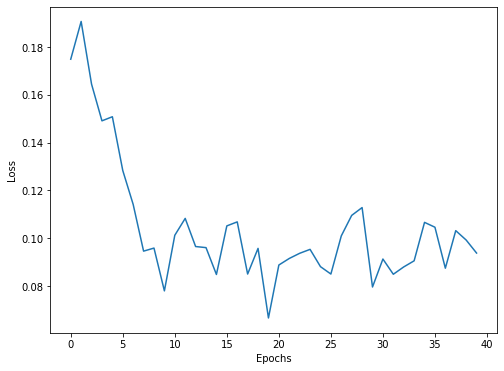

In [188]:
draw(loss_data)
d_network.eval();

In [189]:
test_score = get_accuracy(d_network, True)
print(f'score:\t{test_score * 100:.2f}%')

score:	91.51%
